# Week 3 - Environmental Monitoring & Pollution Control
**Deployment of ML Model**

In [1]:

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [2]:
from google.colab import files
uploaded = files.upload()


Saving environment.csv to environment.csv


In [3]:

# Step 2: Load Dataset
# Replace 'environment.csv' with your dataset filename
df = pd.read_csv("environment.csv")
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (10, 5)


,Date,Temperature(C),Humidity(%),AirQualityIndex,CO2(ppm)
0,2025-01-01,22,60,45,400
1,2025-01-02,21,65,50,405
2,2025-01-03,23,63,48,410
3,2025-01-04,24,62,52,420
4,2025-01-05,22,64,49,415


In [4]:
# Check the first few rows
print(df.head())

# Check the column names
print("Columns in dataset:", df.columns.tolist())


         Date  Temperature(C)  Humidity(%)  AirQualityIndex  CO2(ppm)
0  2025-01-01              22           60               45       400
1  2025-01-02              21           65               50       405
2  2025-01-03              23           63               48       410
3  2025-01-04              24           62               52       420
4  2025-01-05              22           64               49       415
Columns in dataset: ['Date', 'Temperature(C)', 'Humidity(%)', 'AirQualityIndex', 'CO2(ppm)']


In [5]:
print("Columns available:", df.columns.tolist())


Columns available: ['Date', 'Temperature(C)', 'Humidity(%)', 'AirQualityIndex', 'CO2(ppm)']


In [6]:
['Date', 'Temperature', 'Humidity', 'AQI_Value']


['Date', 'Temperature', 'Humidity', 'AQI_Value']

In [7]:
for col in df.columns:
    print(f"'{col}'")



'Date'
'Temperature(C)'
'Humidity(%)'
'AirQualityIndex'
'CO2(ppm)'


In [8]:
target_col = df.columns[-1]   # if AQI is the last column
X = df.drop(target_col, axis=1)
y = df[target_col]


In [9]:
target_col = df.columns[-1]   # if AQI is the last column
X = df.drop(target_col, axis=1)
y = df[target_col]



In [10]:
print(df.columns.tolist())


['Date', 'Temperature(C)', 'Humidity(%)', 'AirQualityIndex', 'CO2(ppm)']


In [11]:
['Date', 'Temperature(C)', 'Humidity(%)', 'AirQualityIndex', 'CO2(ppm)']


['Date', 'Temperature(C)', 'Humidity(%)', 'AirQualityIndex', 'CO2(ppm)']

In [12]:
# Drop non-numeric or irrelevant columns like Date
X = df.drop(["AirQualityIndex", "Date"], axis=1)
y = df["AirQualityIndex"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5
              precision    recall  f1-score   support

          49       0.00      0.00      0.00         0
          50       1.00      1.00      1.00         1
          53       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.33      0.33      0.33         2
weighted avg       0.50      0.50      0.50         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

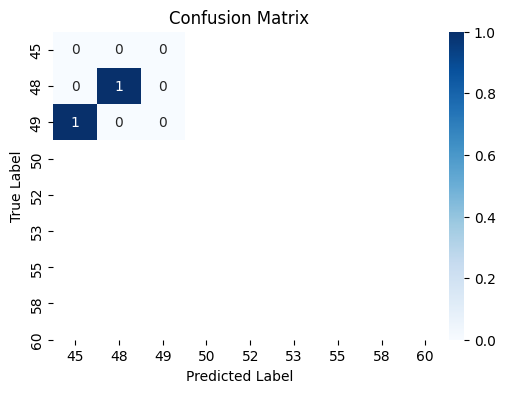

In [14]:

# Step 4.1: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


/tmp/ipython-input-3355986723.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=X.columns[indices], palette="viridis")


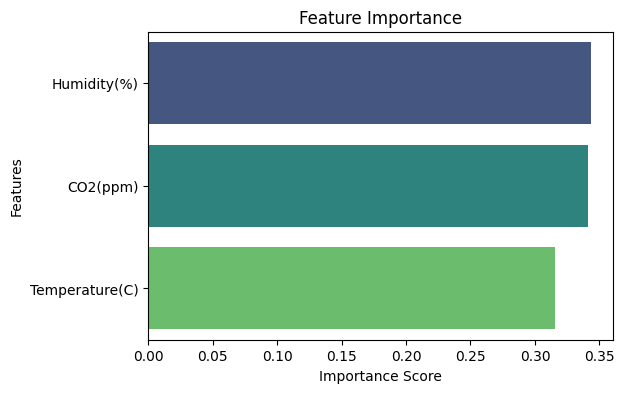

In [15]:

# Step 4.2: Feature Importance Visualization
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(6,4))
sns.barplot(x=importances[indices], y=X.columns[indices], palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [16]:

# Step 5: Save Model
joblib.dump(model, "pollution_model.pkl")


['pollution_model.pkl']

In [17]:

# Step 6: Simple Deployment (Streamlit Example)
# Run this app separately using:  streamlit run Week3_Environmental_Monitoring.ipynb

!pip install streamlit -q

import streamlit as st

st.title("🌱 Pollution Monitoring Prediction")
st.write("Enter environmental parameters to predict pollution levels.")

# Example inputs (replace with your dataset features if different)
temperature = st.number_input("Temperature (°C)", 0, 50)
humidity = st.number_input("Humidity (%)", 0, 100)
pm25 = st.number_input("PM2.5 (µg/m³)", 0, 500)

if st.button("Predict Pollution Level"):
    input_data = np.array([[temperature, humidity, pm25]])
    model = joblib.load("pollution_model.pkl")
    prediction = model.predict(input_data)
    st.success(f"Predicted Pollution Level: {prediction[0]}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 107.0 MB/s eta 0:00:00


2025-09-18 11:05:50.613 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-18 11:05:50.790 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-09-18 11:05:50.791 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-18 11:05:50.793 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-18 11:05:50.795 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-18 11:05:50.796 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-18 11:05:50.797 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-18 11:05:50.798 Thread 'MainThread': mi